In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from PyPinch import PyPinch

In [13]:
options = {'draw'}
pinch = PyPinch('./streams/streams.csv', options)
input_table=pd.read_csv('./streams/streams.csv', skiprows=1)

In [14]:
input_table["Stream Type"]=np.where(input_table[" TSUPPLY"]>input_table[" TTARGET"],"HOT","COLD")
input_table["Heat Capacity Flowrate (kW/K)"]=round(input_table["CP"],2)
#Heat Capacity Flowrate values of all hot streams have been made negative. This convention will be used later to simplify calculations for problem table algorithm.
index=[]
for n in range(1,len(input_table)+1):
    index.append(n)
input_table["Stream Number"]=index
input_table=input_table.set_index('Stream Number')
input_table=input_table.rename(columns={" TSUPPLY": "Ts", " TTARGET": "Tt", "Heat Capacity Flowrate (kW/K)":"FCp"})
hot_streams=input_table[input_table["Stream Type"]=="HOT"]
cold_streams=input_table[input_table["Stream Type"]=="COLD"]
Tmin=20

In [15]:
def Pinch_in_the_grid_representation():
    plt.figure(figsize=(30,10))
    plt.ylim(-1,len(input_table)-0.5)
    plt.xlim(max(input_table["Ts"].max(),input_table["Tt"].max())+Tmin+5,min(input_table["Ts"].min(),input_table["Tt"].min())-Tmin-5) #this will also invert the x-axis limits
    plt.axvline(pinch.pinchTemperature,color='black',lw=0.5,linestyle='dashed')
    for i in range(len(cold_streams)):
        for j in range(len(cold_streams),len(cold_streams)+len(hot_streams)):
            plt.arrow(hot_streams.iloc[j-len(cold_streams)]["Ts"],j,hot_streams.iloc[j-len(cold_streams)]["Tt"]-hot_streams.iloc[j-len(cold_streams)]["Ts"],0,length_includes_head=True,head_length=1.0,head_width=0.1)
            supply_hot=hot_streams.iloc[j-len(cold_streams)]["Ts"]
            plt.text(hot_streams.iloc[j-len(cold_streams)]["Ts"],j,f"{supply_hot}°",ha='right',fontsize=25)
            target_hot=hot_streams.iloc[j-len(cold_streams)]["Tt"]
            plt.text(hot_streams.iloc[j-len(cold_streams)]["Tt"],j,f"{target_hot}°",fontsize=25,ha='right')
            FCp_hot=abs(hot_streams.iloc[j-len(cold_streams)]["FCp"])
            plt.text(hot_streams.iloc[j-len(cold_streams)]["Tt"]-5,j,f"FCp={FCp_hot}kW/K",fontsize=25,fontweight='bold')
            plt.arrow(cold_streams.iloc[i]["Ts"]+Tmin,i,cold_streams.iloc[i]["Tt"]-cold_streams.iloc[i]["Ts"],0,length_includes_head=True,head_length=1.0,head_width=0.1)
            supply_cold=cold_streams.iloc[i]["Ts"]
            plt.text(cold_streams.iloc[i]["Ts"]+Tmin,i,f"{supply_cold}°",fontsize=25,ha='right')
            target_cold=cold_streams.iloc[i]["Tt"]
            plt.text(cold_streams.iloc[i]["Tt"]+Tmin,i,f"{target_cold}°",fontsize=25,ha='right')
            FCp_cold=cold_streams.iloc[i]["FCp"]
            plt.text(cold_streams.iloc[i]["Ts"]+Tmin-5,i,f"FCp={FCp_cold}kW/K",fontsize=25,fontweight='bold') 
    plt.text(max(input_table["Ts"].max(),input_table["Tt"].max())+Tmin,-1,"Hot End",fontsize=20,fontweight='bold')
    plt.text(min(input_table["Ts"].min(),input_table["Tt"].min())-Tmin,-1,"Cold End",fontsize=20,ha="right",fontweight='bold')
    plt.text(pinch.pinchTemperature,-1.5,"The pinch effectively divides the problem into two parts\n Heat exchange cannot take place from one end to another, otherwise there will be penalties",ha="center",fontsize=25) 
    plt.xticks([])
    plt.yticks([])
    plt.title('Pinch in the grid representation',fontsize=40)
    plt.savefig('Pinch in the grid representation.png', dpi=300, bbox_inches='tight')
    plt.show()

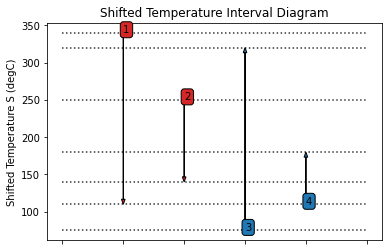

In [16]:
pinch.shiftTemperatures()
pinch.constructTemperatureInterval()
pinch.showPlots()

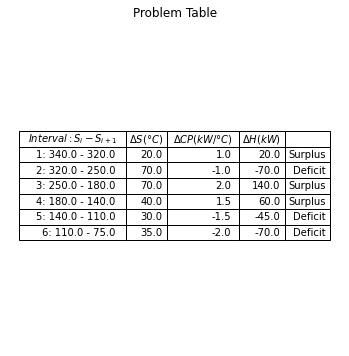

In [17]:
pinch.constructProblemTable()
pinch.showPlots()

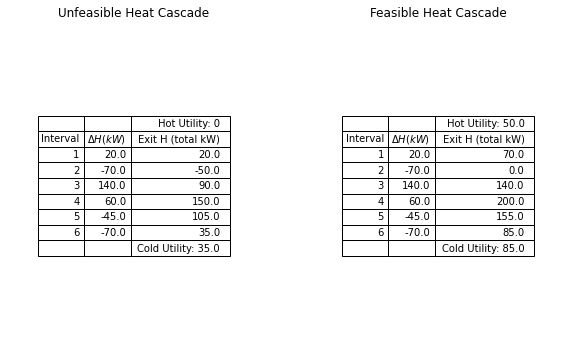

In [18]:
pinch.constructHeatCascade()
pinch.showPlots()

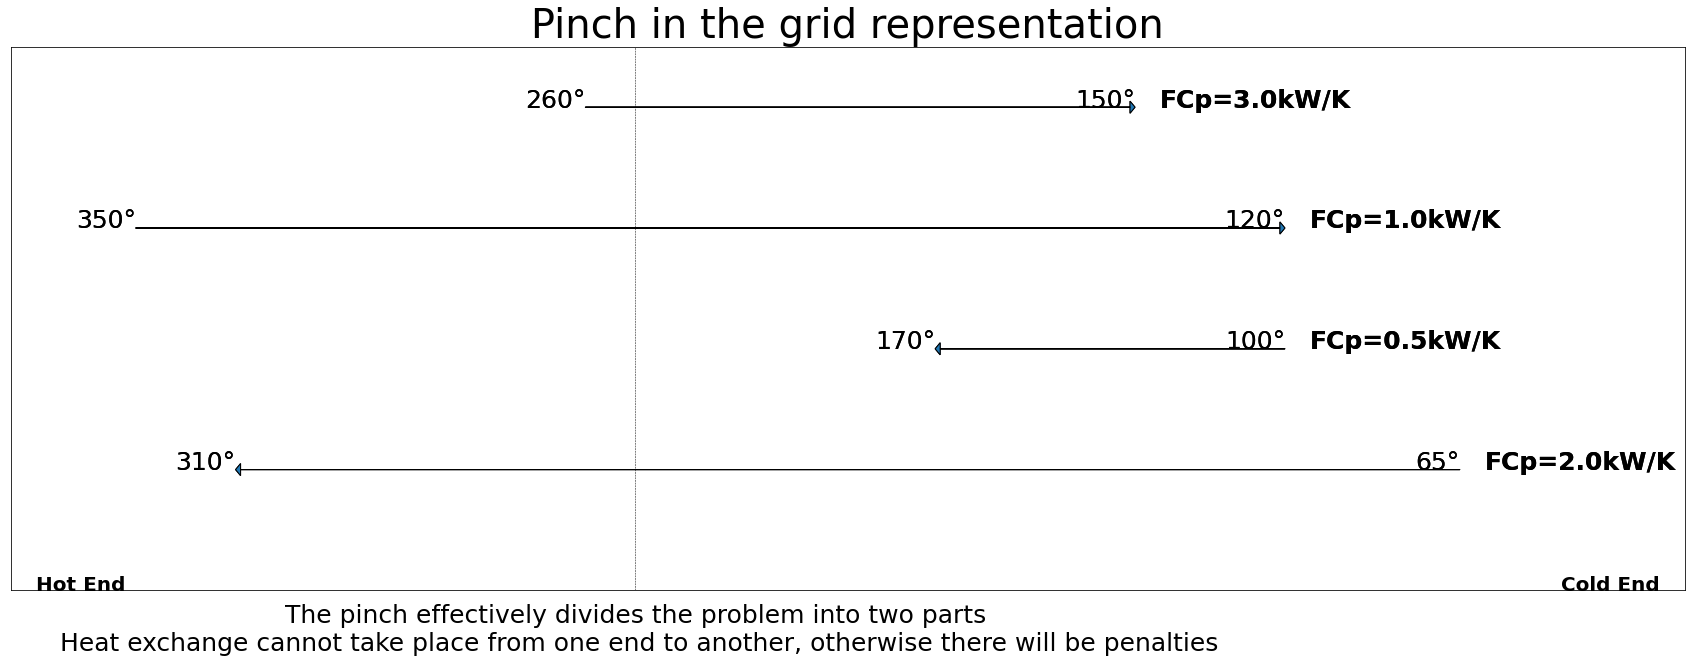

In [19]:
Pinch_in_the_grid_representation()

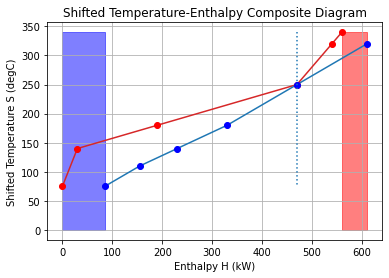

In [20]:
pinch.constructShiftedCompositeDiagram()
pinch.showPlots()

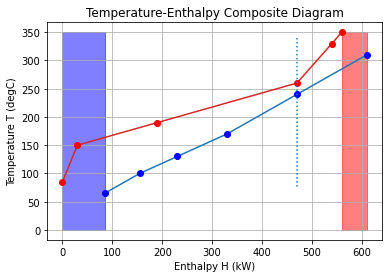

In [21]:
pinch.constructCompositeDiagram()
pinch.showPlots()

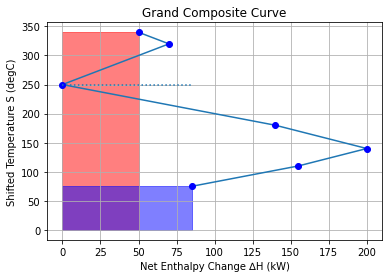

In [22]:
pinch.constructGrandCompositeCurve()
pinch.showPlots()